## ECE113 Lab 0 - Basic Python and DTFT <br> <small> April 23, 2021 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

In [25]:
from __future__ import division

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on CCLE.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

__A0.__ add ? after a function to get the help window.

__Q1.__ What do you have to import to make all division a real division?

__A1.__ For Python 3, simply doing x/y (for example) will be true division.
        For previous versions of Python:
        The line, from _ _ future _ _ import division, will enable real division for all division.
        (underscores are spaced to prevent bolding being applied to "future")

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ np for numpy, plt for matplotlib.pyplot

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print x

__A3.__ [7 2 3 4 5 6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [4]:
# A4.
# just use print()
print("[5 4 3 2 1 0 1 2 3 4]")

[5 4 3 2 1 0 1 2 3 4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [8]:
# A5.
x = []
for i in range(0,5,2):
    x.append(i)
print(x)

[0, 2, 4]


__Q6.__ Generate the same plot as in the following figure inline:
    



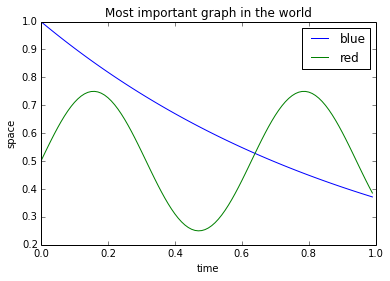

In [4]:
from IPython.display import Image
Image('tutorial_plot.jpg')

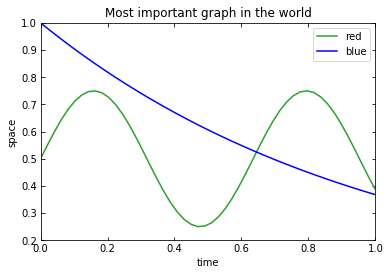

In [44]:
# A6.
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1)
# green --> sinusoid shifted upwards 0.5
#           magnitude --> 0.5 to 0.75 --> 0.25 magnitude
#           w*pi*t  --> 0 at approx 0.3 --> w*pi = pi --> pi/w = approx 0.3 --> w = 3(?)
#           adjusted w until it looked close to target image
a = 0.25*np.sin(3.15*np.pi*t) + 0.5
# blue --> decaying exponential
b = np.exp(-t)

ax = plt.subplot()
ax.plot(t, a, label='red', color='tab:green')
ax.plot(t, b, label='blue', color='blue')
ax.set_xlim(0,1)
ax.set_ylim(0.2,1)
ax.set_xlabel('time')
ax.set_ylabel('space')
ax.tick_params(direction='in',bottom='on',top='on',left='on',right='on')
ax.set_title('Most important graph in the world')
ax.legend()

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [26]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
# from __future__ import division --> moved to beginning of file 
# (before any other code blocks bc otherwise there's an error thrown)
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

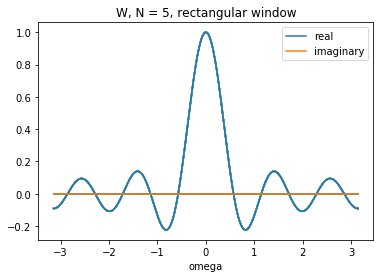

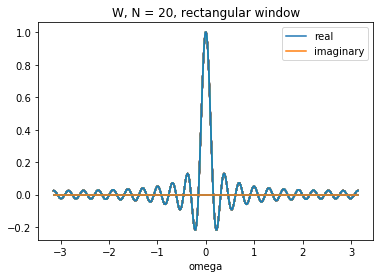

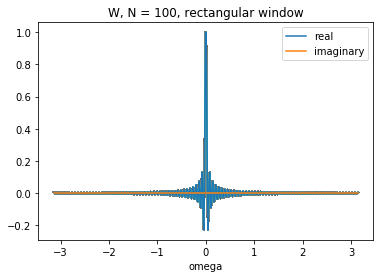

In [63]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        
        # create window function (w) using np.ones
        ### FILL IN ###
        w = np.ones(len(NN))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi, np.pi, 512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)   # np.meshgrid(temporal,freq)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        #print(omega[:,0][255])
        #print(omega[:,0][256])
        W = W/W[255]      # bc of 0 indexing --> half = 512/2 - 1
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()   # want multiple separate plots
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W, N = ' + str(N) + ', rectangular window')
        plt.legend(('real','imaginary'), loc=1)

Describe the effect of increasing $N$ on the DTFT:

Increasing N on the DTFT increases the amount of rippling that the DTFT displays. I would assume that this is because as we're increasing N, we're increasing the amount of temporal indeces to map to the frequency domain, which causes more undulation on the graph.

----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

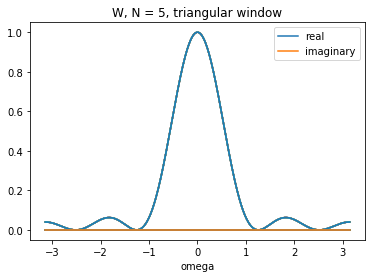

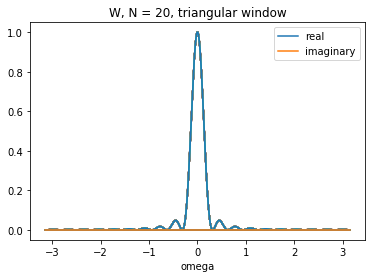

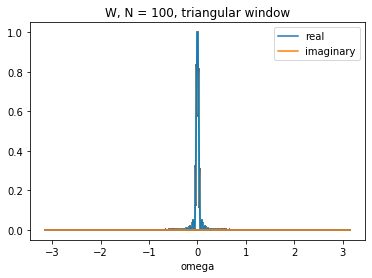

In [64]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        # create window function (w) 
        ### FILL IN ###
        w_ones = np.ones(len(NN))
        w = (1 - (np.abs(NN)/N))*w_ones
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi,np.pi,512)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        W = W/W[255]
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()   # want multiple separate plots
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W, N = ' + str(N) + ', triangular window')
        plt.legend(('real','imaginary'), loc=1)

Describe the effect of increasing $N$ on the DTFT:

Similarly to the rectangular window case, increasing N causes more undulation in the graphs of the DTFT.

----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

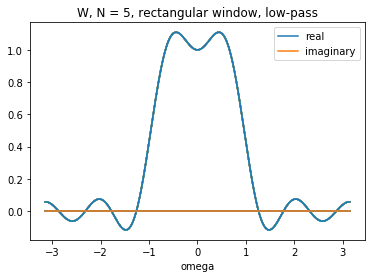

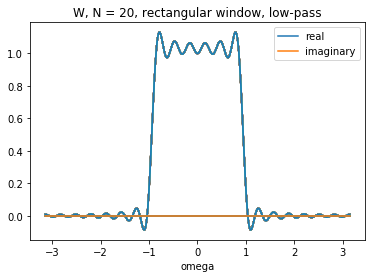

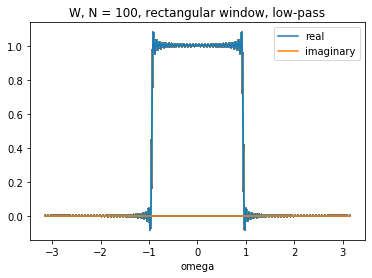

In [66]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        ### FILL IN ###
        # low pass filter --> sinc function = sinx / x
        # np.sinc defined as sin(pi*x)/(pi*x) (normalised)
        w_ones = np.ones(len(NN))    # rectangular window
        sinc = 0.3*np.sinc(0.3*NN)   # don't include np.pi inside sinc bc of normalised definition in numpy
        w = w_ones*sinc
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        W = W/W[255]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()   # want multiple separate plots
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W, N = ' + str(N) + ', rectangular window, low-pass')
        plt.legend(('real','imaginary'), loc=1)

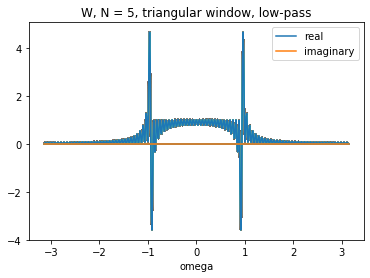

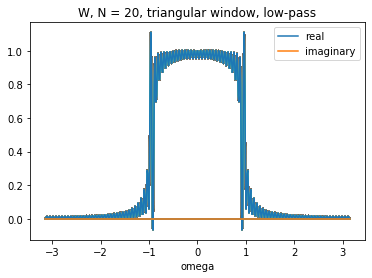

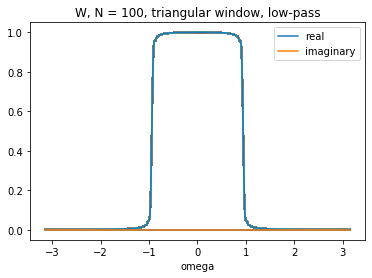

In [67]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        # create window function (w)
        ### FILL IN ###
        w_ones = np.ones(len(NN))
        w_tri = (1 - (np.abs(NN)/N))*w_ones
        sinc = 0.3*np.sinc(0.3*NN)
        w = w_tri*sinc
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        W = W/W[255]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()   # want multiple separate plots
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W, N = ' + str(N) + ', triangular window, low-pass')
        plt.legend(('real','imaginary'), loc=1)

Explain the difference:

Between the triangular window and the rectangular window, the low pass filter applied to the triangular window has upper edges that are more rounded out (mainly as N gets high), whereas the low pass filter applied to the rectangular window retains a more boxy shape.

____